# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [2]:
from __future__ import print_function, division

import nsfg

## Examples from Chapter 1

Read NSFG data into a Pandas DataFrame.

In [3]:
preg = nsfg.ReadFemPreg()
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


Print the column names.

In [4]:
preg.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

Select a single column name.

In [5]:
preg.columns[1]

'pregordr'

Select a column and check what type it is.

In [6]:
pregordr = preg['pregordr']
type(pregordr)

pandas.core.series.Series

Print a column.

In [7]:
pregordr

0        1
1        2
2        1
3        2
4        3
        ..
13588    1
13589    2
13590    3
13591    4
13592    5
Name: pregordr, Length: 13593, dtype: int64

Select a single element from a column.

In [8]:
pregordr[0]

1

Select a slice from a column.

In [9]:
pregordr[2:5]

2    1
3    2
4    3
Name: pregordr, dtype: int64

Select a column using dot notation.

In [10]:
pregordr = preg.pregordr

Count the number of times each value occurs.

In [11]:
preg.outcome.value_counts().sort_index()

1    9148
2    1862
3     120
4    1921
5     190
6     352
Name: outcome, dtype: int64

Check the values of another variable.

In [12]:
preg.birthwgt_lb.value_counts().sort_index()

0.0        8
1.0       40
2.0       53
3.0       98
4.0      229
5.0      697
6.0     2223
7.0     3049
8.0     1889
9.0      623
10.0     132
11.0      26
12.0      10
13.0       3
14.0       3
15.0       1
Name: birthwgt_lb, dtype: int64

Make a dictionary that maps from each respondent's `caseid` to a list of indices into the pregnancy `DataFrame`.  Use it to select the pregnancy outcomes for a single respondent.

In [13]:
caseid = 10229
preg_map = nsfg.MakePregMap(preg)
indices = preg_map[caseid]
preg.outcome[indices].values

array([4, 4, 4, 4, 4, 4, 1], dtype=int64)

## Exercises

Select the `birthord` column, print the value counts, and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611933)

In [14]:
# Solution goes here
birthord = preg['birthord']
birthord.value_counts().sort_index()

1.0     4413
2.0     2874
3.0     1234
4.0      421
5.0      126
6.0       50
7.0       20
8.0        7
9.0        2
10.0       1
Name: birthord, dtype: int64

We can also use `isnull` to count the number of nans.

In [15]:
preg.birthord.isnull().sum()

4445

Select the `prglngth` column, print the value counts, and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611931)

In [16]:
# Solution goes here
prglngth = preg['prglngth']
prglngth.value_counts().sort_index()

0       15
1        9
2       78
3      151
4      412
5      181
6      543
7      175
8      409
9      594
10     137
11     202
12     170
13     446
14      29
15      39
16      44
17     253
18      17
19      34
20      18
21      37
22     147
23      12
24      31
25      15
26     117
27       8
28      38
29      23
30     198
31      29
32     122
33      50
34      60
35     357
36     329
37     457
38     609
39    4744
40    1120
41     591
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: prglngth, dtype: int64

To compute the mean of a column, you can invoke the `mean` method on a Series.  For example, here is the mean birthweight in pounds:

In [17]:
preg.totalwgt_lb.mean()

7.265628457623368

Create a new column named <tt>totalwgt_kg</tt> that contains birth weight in kilograms.  Compute its mean.  Remember that when you create a new column, you have to use dictionary syntax, not dot notation.

In [18]:
# Solution goes here
preg['totalwgt_kg'] = preg['totalwgt_lb']/2.2
preg.totalwgt_kg.mean()

3.302558389828807

`nsfg.py` also provides `ReadFemResp`, which reads the female respondents file and returns a `DataFrame`:

In [19]:
resp = nsfg.ReadFemResp()

`DataFrame` provides a method `head` that displays the first five rows:

In [21]:
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


Select the `age_r` column from `resp` and print the value counts.  How old are the youngest and oldest respondents?

In [22]:
# Solution goes here
resp.age_r.value_counts().sort_index()
# min 15, max 44

15    217
16    223
17    234
18    235
19    241
20    258
21    267
22    287
23    282
24    269
25    267
26    260
27    255
28    252
29    262
30    292
31    278
32    273
33    257
34    255
35    262
36    266
37    271
38    256
39    215
40    256
41    250
42    215
43    253
44    235
Name: age_r, dtype: int64

We can use the `caseid` to match up rows from `resp` and `preg`.  For example, we can select the row from `resp` for `caseid` 2298 like this:

In [23]:
resp[resp.caseid==2298]

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667


And we can get the corresponding rows from `preg` like this:

In [24]:
preg[preg.caseid==2298]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb,totalwgt_kg
2610,2298,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.125000
2611,2298,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,5.5000,2.500000
2612,2298,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,4.1875,1.903409
2613,2298,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.125000


How old is the respondent with `caseid` 1?

In [28]:
# Solution goes here
resp[resp.caseid==1].age_r
# 44

1069    44
Name: age_r, dtype: int64

What are the pregnancy lengths for the respondent with `caseid` 2298?

In [26]:
# Solution goes here
preg[preg.caseid==2298].prglngth
# 40, 36, 30, 40

2610    40
2611    36
2612    30
2613    40
Name: prglngth, dtype: int64

What was the birthweight of the first baby born to the respondent with `caseid` 5012?

In [27]:
# Solution goes here
preg[preg.caseid==5201].totalwgt_lb
# 7.6875 lb

5678    7.6875
5679    6.5000
5680    5.6875
Name: totalwgt_lb, dtype: float64

# Moving onto problem 1.2

In [29]:
# need to read 2002FemResp.dat.gz
def ReadFemResp(dct_file='2002FemResp.dct',
                dat_file='2002FemResp.dat.gz',
                nrows=None):
    """Reads the NSFG respondent data.
    dct_file: string file name
    dat_file: string file name
    returns: DataFrame
    """
    dct = thinkstats2.ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file, compression='gzip', nrows=nrows)
    CleanFemResp(df)
    return df

# This is already built in like this

In [30]:
# Read the file
resp = nsfg.ReadFemResp()

In [31]:
# printing the value counts
resp.pregnum.value_counts().sort_index()

0     2610
1     1267
2     1432
3     1110
4      611
5      305
6      150
7       80
8       40
9       21
10       9
11       3
12       2
14       2
19       1
Name: pregnum, dtype: int64

In [46]:
# map from case number to index in pregnum
nsfg.MakePregMap(resp)

defaultdict(list,
            {2298: [0],
             5012: [1],
             11586: [2],
             6794: [3],
             616: [4],
             845: [5],
             10333: [6],
             855: [7],
             8656: [8],
             3566: [9],
             5917: [10],
             9200: [11],
             6320: [12],
             11700: [13],
             7354: [14],
             3697: [15],
             4881: [16],
             5862: [17],
             8542: [18],
             2054: [19],
             3719: [20],
             11740: [21],
             11343: [22],
             7075: [23],
             5422: [24],
             2178: [25],
             8358: [26],
             5083: [27],
             1545: [28],
             5656: [29],
             9334: [30],
             5507: [31],
             611: [32],
             4260: [33],
             11767: [34],
             5573: [35],
             11901: [36],
             8975: [37],
             5267: [38],
             9

In [65]:
# cross validate resp with preg files
casenum = 4881 # any number can be checked here
index = nsfg.MakePregMap(resp)[casenum]
preg_cases = len(preg[preg.caseid==casenum])
resp_pregnum = resp.pregnum[index[0]]
print('Cases from preg: {}'.format(preg_cases))
print('Pregnum from resp: {}'.format(resp_pregnum))
if preg_cases == resp_pregnum:
    print('Match')
else:
    print('No match')

Cases from preg: 3
Pregnum from resp: 3
Match


# Problem 2.1

If I were to try to get on the evening news, I would want to look for a statistic that was shocking. A way to do that would be to look for outliers. Even a single case of a first born being born much later might do the trick. 

To reassure a parent, I would use the mean values of first born compared to all babies, combined with the variance to show that the mean difference is MUCH smaller than the variance. This is essentially computing Cohen's d to show that there is no real significant difference between pregnancy times for first born vs other babies.

The latter is the approach I would take if i was writing for straightdope.com. I would say something like this: The difference in mean pregnancy length between first born babies and others is only 13 hours. By comparison, the standard deviation of pregnancy lengths is 2-3 weeks. This makes the difference in means 0.029 standard deviations, which is so small as to not be noticably different. We can reasonably say that first born children should not be expected to be born any earlier or later than the other children.

# Problem 2.4

In [67]:
# Get data from live births
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

# Separate first babies from others
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

# Get the weights
firsts_weight = firsts.totalwgt_lb
others_weight = others.totalwgt_lb

In [84]:
import matplotlib.pyplot as plt
import math

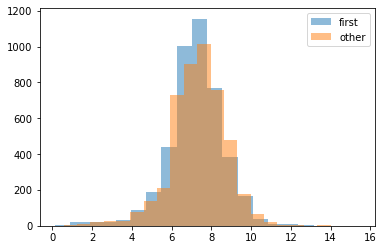

In [77]:
# Make a pretty histogram
bins = 20
plt.hist(firsts_weight, bins=bins, alpha=0.5, label='first')
plt.hist(others_weight, bins=bins, alpha=0.5, label='other')
plt.legend()
plt.show()

In [82]:
# Get some statistics
firsts_mean = firsts_weight.mean()
others_mean = others_weight.mean()
print('First babies mean weight: {}'.format(firsts_mean))
print('Other babies mean weight: {}'.format(others_mean))

# Standard deviation now
firsts_std = firsts_weight.std()
others_std = others_weight.std()
print('First babies standard deviation in weight: {}'.format(firsts_std))
print('Other babies standard deviation in weight: {}'.format(others_std))

First babies mean weight: 7.201094430437772
Other babies mean weight: 7.325855614973262
First babies standard deviation in weight: 1.4205728777207374
Other babies standard deviation in weight: 1.3941954762143138


In [85]:
# Quantify further using Cohen's d
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d

cohen_d = CohenEffectSize(firsts_weight, others_weight)
print(cohen_d)

-0.088672927072602


Mean difference is 0.09 of the standard deviation. This is a pretty small difference. This is larger than Cohen's d for pregnancy lengths, but still very small of an effect. First babies from this data set weigh less than others, but by a very small amount compared to the variance.